In [59]:
import numpy as np
import pandas as pd

filename = '/home/ajay/Desktop/Athletics/athletes.csv'
athletes_df = pd.read_csv(filename)

athletes_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71,cycling,0,0,0


In [60]:
filename = '/home/ajay/Desktop/Athletics/countries.csv'
countries_df = pd.read_csv(filename)

countries_df.head()

,country,code,population,gdp_per_capita
0,Afghanistan,AFG,32526562,594.323081
1,Albania,ALB,2889167,3945.217582
2,Algeria,ALG,39666519,4206.031232
3,American Samoa*,ASA,55538,NaN
4,Andorra,AND,70473,NaN


In [61]:
filename = '/home/ajay/Desktop/Athletics/events.csv'
events_df = pd.read_csv(filename)

events_df.head()

,id,sport,discipline,name,sex,venues
0,701492,aquatics,backstroke,Women's 100m Backstroke,female,Olympic Aquatics Stadium
1,305278,aquatics,backstroke,Women's 200m Backstroke,female,Olympic Aquatics Stadium
2,708010,aquatics,backstroke,Men's 100m Backstroke,male,Olympic Aquatics Stadium
3,729643,aquatics,backstroke,Men's 200m Backstroke,male,Olympic Aquatics Stadium
4,567019,aquatics,breaststroke,Women's 100m Breaststroke,female,Olympic Aquatics Stadium


In [62]:
athletes_df['height'].replace('', 0, inplace=True)
athletes_df['weight'].replace('', 0, inplace=True)

In [63]:
athletes_df = athletes_df[athletes_df.height > 0]
athletes_df = athletes_df[athletes_df.weight > 0]

In [64]:
athletes_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71,cycling,0,0,0


In [65]:
male = athletes_df[athletes_df.sex == 'male']

male.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64,athletics,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67,triathlon,0,0,0


In [66]:
female = athletes_df[athletes_df.sex == 'female']

female.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56,fencing,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54,athletics,0,0,0
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68,aquatics,1,1,0


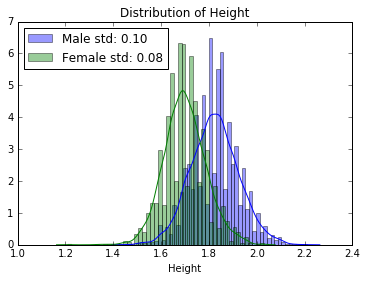

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('Athletes.pdf')
sns.distplot(male.height, hist=True, label='Male std: ' + str(np.std(male.height))[:4])
sns.distplot(female.height, hist=True, label = 'Female std: ' + str(np.std(female.height))[:4])
plt.xlabel('Height')
plt.title('Distribution of Height')
plt.legend(loc=2)

pp.savefig()

plt.show()

In [68]:
sport = athletes_df.groupby('sport', as_index=False).mean()

sport.head()

,sport,id,height,weight,gold,silver,bronze
0,aquatics,5.030861e+08,1.788338,72.277221,0.085244,0.078797,0.075931
1,archery,5.047355e+08,1.735952,72.190476,0.063492,0.063492,0.063492
2,athletics,5.019083e+08,1.752039,67.717421,0.029264,0.027892,0.026520
3,badminton,4.967358e+08,1.745610,68.774390,0.048780,0.048780,0.042683
4,basketball,5.038546e+08,1.919120,87.750000,0.084507,0.084507,0.084507


In [69]:
sports = list(sport.sport)

sports

['aquatics',
 'archery',
 'athletics',
 'badminton',
 'basketball',
 'canoe',
 'cycling',
 'equestrian',
 'fencing',
 'football',
 'golf',
 'gymnastics',
 'handball',
 'hockey',
 'judo',
 'modern pentathlon',
 'rowing',
 'rugby sevens',
 'sailing',
 'shooting',
 'table tennis',
 'taekwondo',
 'tennis',
 'triathlon',
 'volleyball',
 'weightlifting',
 'wrestling']

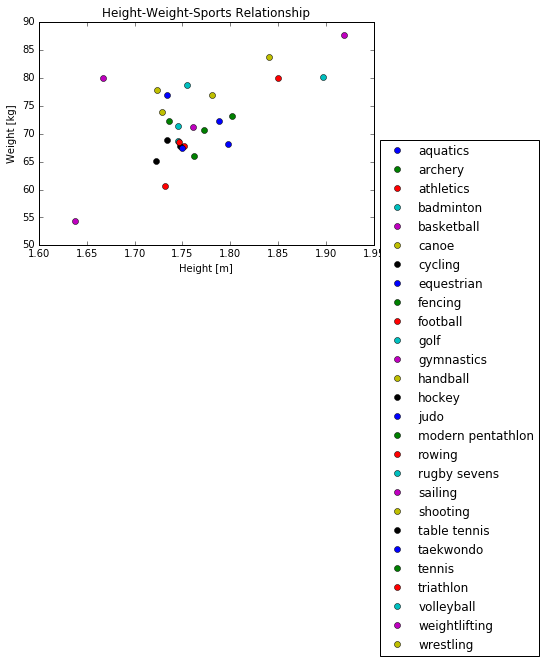

In [78]:
legends = []
for game in sports:
    plt.plot(sport.height[sport.sport == game], sport.weight[sport.sport == game], 'o')
    legends.append(game)
    #plt.hold(True)
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.title('Height-Weight-Sports Relationship')
plt.legend(legends, loc='upper left', numpoints = 1, bbox_to_anchor=(1, 0.5))
pp.savefig()
plt.show()

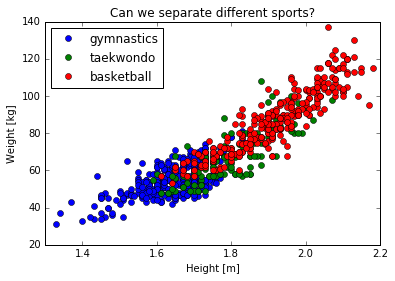

In [79]:
my_sports = ['gymnastics', 'taekwondo', 'basketball']
legends = []

for my_game in my_sports:
    plt.plot(athletes_df.height[athletes_df.sport == my_game], athletes_df.weight[athletes_df.sport == my_game], 'o')
    legends.append(my_game)
    #plt.hold(True)
    
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.title('Can we separate different sports?')
plt.legend(legends, loc=2, numpoints=1)
pp.savefig()
plt.show()

In [80]:
pp.close()